In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

from graspy.simulations import p_from_latent, sample_edges
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

%matplotlib inline

/Users/bijanvarjavand/Documents/spring20/ndd/venv-graspy/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def profile(test, metric, n_sims=200, n_verts=200, n_components=2, directed=False):
    latent_size = (n_verts, n_components)
    latent = np.random.uniform(0.2, 0.5, size=latent_size)

    p_mat = p_from_latent(latent, rescale=False, loops=False)

    sim_p_vals = np.zeros(n_sims)
    for i in tqdm(range(n_sims)):
        graph1 = sample_edges(p_mat, directed=directed, loops=False)
        graph2 = sample_edges(p_mat, directed=directed, loops=False)
        ldt = LatentDistributionTest(test, metric, 
                                     n_components=n_components, n_bootstraps=100)
        out = ldt.fit(graph1, graph2)
        p_val = ldt.p_value_
        sim_p_vals[i] = p_val
    return sim_p_vals

def plot_sim(sim_p_vals, n_sims=200, n_verts=200, n_components=2):
    sns.set_context("paper", font_scale=1.5)
    plt.style.use("seaborn-white")
    sns.set_palette("deep")
    kwargs = {'cumulative': True}
    sns.distplot(sim_p_vals, hist_kws=kwargs, kde_kws=kwargs)
    plt.plot(np.arange(len(sim_p_vals))/len(sim_p_vals), np.linspace(1/len(sim_p_vals),1,num=len(sim_p_vals)))
    plt.xlabel("P-value")
    plt.title(f"n_sims: {n_sims}, n_verts: {n_verts}, n_components: {n_components}")
    plt.show()

In [3]:
_TESTS = ['cca', 'dcorr', 'hsic', 'mgc']
_METRICS = ['euclidean', 'gaussian']

In [ ]:
# mydict = {}
# for test in _TESTS:
#     for metric in _METRICS:
#         mydict[str(test)+"_"+str(metric)] = profile(test, metric)

In [5]:
import _pickle as pkl

In [ ]:
mydict = pkl.load(open('../../../exps/myfile.pkl', 'rb'))

cca euclidean


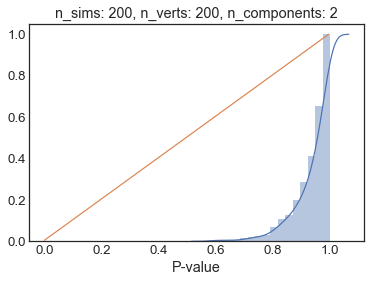

cca gaussian


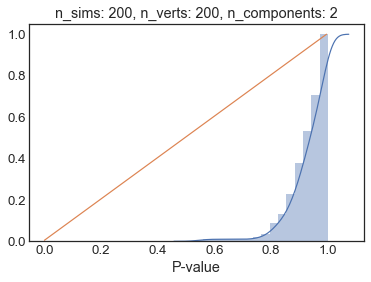

dcorr euclidean


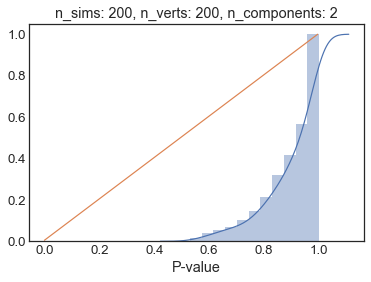

dcorr gaussian


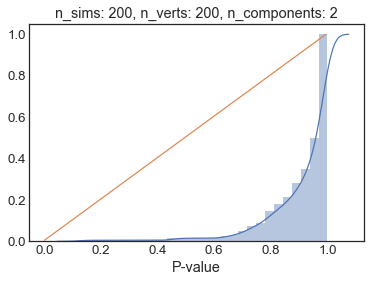

hsic euclidean


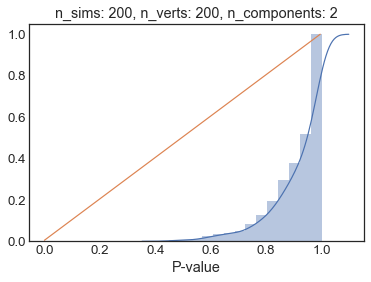

hsic gaussian


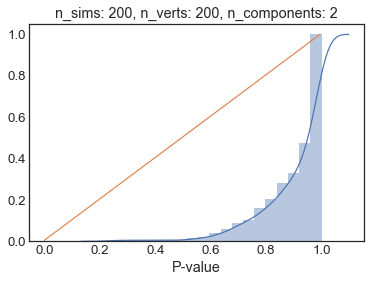

mgc euclidean


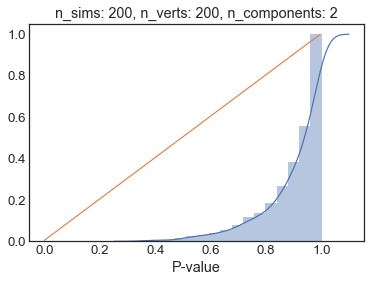

mgc gaussian


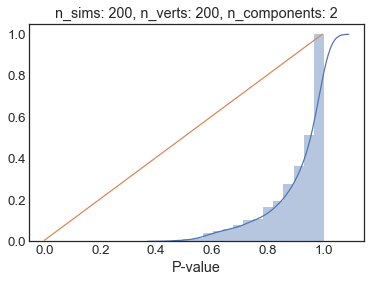

In [6]:
for test in _TESTS:
    for metric in _METRICS:
        print(test, metric)
        plot_sim(mydict[str(test)+"_"+str(metric)])